<center> <img src = https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/hh%20label.jpg alt="drawing" style="width:400px;">

# <center> Проект: Анализ резюме из HeadHunter
   

In [211]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Исследование структуры данных

1. Прочитайте данные с помощью библиотеки Pandas. Совет: перед чтением обратите внимание на разделитель внутри файла. 

In [212]:
#ваш код здесь
df = pd.read_csv('dst-3.0_16_1_hh_database.csv', sep=';') 

2. Выведите несколько первых (последних) строк таблицы, чтобы убедиться в том, что ваши данные не повреждены. Ознакомьтесь с признаками и их структурой.

In [213]:
#ваш код здесь
# Вывод первых 5 строк
print("Первые строки таблицы:")
print(df.head())

# Вывод последних 5 строк
print("\nПоследние строки таблицы:")
print(df.tail())

# Вывод примеров значений в столбце "Пол, возраст"
print("\nПримеры значений в столбце 'Пол, возраст':")
print(df['Пол, возраст'].head(10))  # Замените 10 на нужное количество строк

Первые строки таблицы:
                                   Пол, возраст           ЗП  \
0    Мужчина ,  39 лет , родился 27 ноября 1979   29000 руб.   
1     Мужчина ,  60 лет , родился 20 марта 1959   40000 руб.   
2  Женщина ,  36 лет , родилась 12 августа 1982   20000 руб.   
3      Мужчина ,  38 лет , родился 25 июня 1980  100000 руб.   
4     Женщина ,  26 лет , родилась 3 марта 1993  140000 руб.   

                           Ищет работу на должность:  \
0                            Системный администратор   
1                               Технический писатель   
2                                           Оператор   
3  Веб-разработчик (HTML / CSS / JS / PHP / базы ...   
4                  Региональный менеджер по продажам   

                        Город, переезд, командировки  \
0  Советск (Калининградская область) , не готов к...   
1  Королев , не готов к переезду , готов к редким...   
2  Тверь , не готова к переезду , не готова к ком...   
3  Саратов , не готов к переезд

3. Выведите основную информацию о числе непустых значений в столбцах и их типах в таблице.

4. Обратите внимание на информацию о числе непустых значений.

In [214]:
#ваш код здесь
# Вывод основной информации о таблице
print("Основная информация о таблице:")
df.info()

# Опционально: анализ числа пустых значений
print("\nЧисло пустых значений в каждом столбце:")
missing_values = df.isnull().sum()
print(missing_values)

# Вывод доли непустых значений
print("\nДоля непустых значений в каждом столбце:")
not_null_fraction = df.notnull().mean() * 100
print(not_null_fraction)

Основная информация о таблице:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44744 entries, 0 to 44743
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Пол, возраст                     44744 non-null  object
 1   ЗП                               44744 non-null  object
 2   Ищет работу на должность:        44744 non-null  object
 3   Город, переезд, командировки     44744 non-null  object
 4   Занятость                        44744 non-null  object
 5   График                           44744 non-null  object
 6   Опыт работы                      44576 non-null  object
 7   Последнее/нынешнее место работы  44743 non-null  object
 8   Последняя/нынешняя должность     44742 non-null  object
 9   Образование и ВУЗ                44744 non-null  object
 10  Обновление резюме                44744 non-null  object
 11  Авто                             44744 non-null  object
dtypes

5. Выведите основную статистическую информацию о столбцах.


In [215]:
#ваш код здесь
# Основная статистическая информация о числовых столбцах
print("Статистическая информация о числовых столбцах:")
print(df.describe())


Статистическая информация о числовых столбцах:
                                         Пол, возраст          ЗП  \
count                                           44744       44744   
unique                                          16003         690   
top     Мужчина ,  32 года , родился 17 сентября 1986  50000 руб.   
freq                                               18        4064   

       Ищет работу на должность:  \
count                      44744   
unique                     14929   
top      Системный администратор   
freq                        3099   

                             Город, переезд, командировки         Занятость  \
count                                               44744             44744   
unique                                              10063                38   
top     Москва , не готов к переезду , не готов к кома...  полная занятость   
freq                                                 1261             30026   

             График           

# Преобразование данных

1. Начнем с простого - с признака **"Образование и ВУЗ"**. Его текущий формат это: **<Уровень образования год выпуска ВУЗ специальность...>**. Например:
* Высшее образование 2016 Московский авиационный институт (национальный исследовательский университет)...
* Неоконченное высшее образование 2000  Балтийская государственная академия рыбопромыслового флота…
Нас будет интересовать только уровень образования.

Создайте с помощью функции-преобразования новый признак **"Образование"**, который должен иметь 4 категории: "высшее", "неоконченное высшее", "среднее специальное" и "среднее".

Выполните преобразование, ответьте на контрольные вопросы и удалите признак "Образование и ВУЗ".

Совет: обратите внимание на структуру текста в столбце **"Образование и ВУЗ"**. Гарантируется, что текущий уровень образования соискателя всегда находится в первых 2ух слов и начинается с заглавной буквы. Воспользуйтесь этим.

*Совет: проверяйте полученные категории, например, с помощью метода unique()*


In [216]:
#ваш код здесь
# Функция для извлечения уровня образования
def extract_education(education_str):
    if "Высшее" in education_str:
        return "высшее"
    elif "Неоконченное высшее" in education_str:
        return "неоконченное высшее"
    elif "Среднее специальное" in education_str:
        return "среднее специальное"
    elif "Среднее" in education_str:
        return "среднее"
    return None  # На случай, если значение не соответствует категориям

# Создание нового признака "Образование"
df['Образование'] = df['Образование и ВУЗ'].apply(extract_education)

# Проверка полученных категорий
print("Уникальные значения в столбце 'Образование':")
print(df['Образование'].unique())

# Удаление старого столбца
df = df.drop(columns=['Образование и ВУЗ'])

# Просмотр первых строк для проверки
print("\nПервые строки таблицы после преобразования:")
print(df.head())

Уникальные значения в столбце 'Образование':
['неоконченное высшее' 'высшее' 'среднее специальное' 'среднее']

Первые строки таблицы после преобразования:
                                   Пол, возраст           ЗП  \
0    Мужчина ,  39 лет , родился 27 ноября 1979   29000 руб.   
1     Мужчина ,  60 лет , родился 20 марта 1959   40000 руб.   
2  Женщина ,  36 лет , родилась 12 августа 1982   20000 руб.   
3      Мужчина ,  38 лет , родился 25 июня 1980  100000 руб.   
4     Женщина ,  26 лет , родилась 3 марта 1993  140000 руб.   

                           Ищет работу на должность:  \
0                            Системный администратор   
1                               Технический писатель   
2                                           Оператор   
3  Веб-разработчик (HTML / CSS / JS / PHP / базы ...   
4                  Региональный менеджер по продажам   

                        Город, переезд, командировки  \
0  Советск (Калининградская область) , не готов к...   
1  Королев 

2. Теперь нас интересует столбец **"Пол, возраст"**. Сейчас он представлен в формате **<Пол , возраст , дата рождения >**. Например:
* Мужчина , 39 лет , родился 27 ноября 1979 
* Женщина , 21 год , родилась 13 января 2000
Как вы понимаете, нам необходимо выделить каждый параметр в отдельный столбец.

Создайте два новых признака **"Пол"** и **"Возраст"**. При этом важно учесть:
* Признак пола должен иметь 2 уникальных строковых значения: 'М' - мужчина, 'Ж' - женщина. 
* Признак возраста должен быть представлен целыми числами.

Выполните преобразование, ответьте на контрольные вопросы и удалите признак **"Пол, возраст"** из таблицы.

*Совет: обратите внимание на структуру текста в столбце, в части на то, как разделены параметры пола, возраста и даты рождения между собой - символом ' , '. 
Гарантируется, что структура одинакова для всех строк в таблице. Вы можете воспользоваться этим.*


In [217]:
# Проверяем наличие столбца "Пол, возраст"
if 'Пол, возраст' in df.columns:
    # Удаляем лишние пробелы в столбце "Пол, возраст"
    df['Пол, возраст'] = df['Пол, возраст'].str.strip()

    # Извлечение пола
    df['Пол'] = df['Пол, возраст'].str.extract(r'^\s*(Мужчина|Женщина)\s*').replace({'Мужчина': 'М', 'Женщина': 'Ж'})
    
    # Извлечение возраста
    df['Возраст'] = df['Пол, возраст'].str.extract(r',\s*(\d+)\s*(?:год|года|лет)')
    
    # Преобразование возраста в целое число
    df['Возраст'] = pd.to_numeric(df['Возраст'], errors='coerce').astype('Int64')  # Используем 'Int64' для обработки NaN
    
    # Удаление исходного столбца "Пол, возраст"
    df = df.drop(columns=['Пол, возраст'])
    
    # Проверка результата
    print("Пример данных после преобразования:")
    print(df[['Пол', 'Возраст']].head())
else:
    print("Столбец 'Пол, возраст' отсутствует.")


Пример данных после преобразования:
  Пол  Возраст
0   М       39
1   М       60
2   Ж       36
3   М       38
4   Ж       26


3. Следующим этапом преобразуем признак **"Опыт работы"**. Его текущий формат - это: **<Опыт работы: n лет m месяцев, периоды работы в различных компаниях…>**. 

Из столбца нам необходимо выделить общий опыт работы соискателя в месяцах, новый признак назовем "Опыт работы (месяц)"

Для начала обсудим условия решения задачи:
* Во-первых, в данном признаке есть пропуски. Условимся, что если мы встречаем пропуск, оставляем его как есть (функция-преобразование возвращает NaN)
* Во-вторых, в данном признаке есть скрытые пропуски. Для некоторых соискателей в столбце стоит значения "Не указано". Их тоже обозначим как NaN (функция-преобразование возвращает NaN)
* В-третьих, нас не интересует информация, которая описывается после указания опыта работы (периоды работы в различных компаниях)
* В-четвертых, у нас есть проблема: опыт работы может быть представлен только в годах или только месяцах. Например, можно встретить следующие варианты:
    * Опыт работы 3 года 2 месяца…
    * Опыт работы 4 года…
    * Опыт работы 11 месяцев…
    * Учитывайте эту особенность в вашем коде

Учитывайте эту особенность в вашем коде

В результате преобразования у вас должен получиться столбец, содержащий информацию о том, сколько месяцев проработал соискатель.
Выполните преобразование, ответьте на контрольные вопросы и удалите столбец **"Опыт работы"** из таблицы.


In [218]:
# Функция для извлечения опыта работы в месяцах
def calculate_experience(row):
    if pd.isna(row) or "Не указано" in str(row):
        return None  # Пропущенные значения или "Не указано"
    try:
        # Ищем "X лет Y месяцев" с помощью регулярного выражения
        match = re.search(r"(\d+)\s*(?:год|года|лет)?(?:\s+(\d+)\s*(?:месяц|месяца|месяцев))?", str(row))
        years = int(match.group(1)) if match and match.group(1) else 0
        months = int(match.group(2)) if match and match.group(2) else 0
        return years * 12 + months
    except:
        return None

# Проверяем наличие столбца "Опыт работы"
if 'Опыт работы' in df.columns:
    # Создаём новый столбец "Опыт работы (месяц)"
    df['Опыт работы (месяц)'] = df['Опыт работы'].apply(calculate_experience)

    # Удаляем старый столбец "Опыт работы"
    df = df.drop(columns=['Опыт работы'])

    # Проверка результата
    print("Пример данных после преобразования:")
    print(df[['Опыт работы (месяц)']].head())
else:
    print("Столбец 'Опыт работы' отсутствует.")


Пример данных после преобразования:
   Опыт работы (месяц)
0                202.0
1                233.0
2                123.0
3                225.0
4                 67.0


4. Хорошо идем! Следующий на очереди признак "Город, переезд, командировки". Информация в нем представлена в следующем виде: **<Город , (метро) , готовность к переезду (города для переезда) , готовность к командировкам>**. В скобках указаны необязательные параметры строки. Например, можно встретить следующие варианты:

* Москва , не готов к переезду , готов к командировкам
* Москва , м. Беломорская , не готов к переезду, не готов к командировкам
* Воронеж , готов к переезду (Сочи, Москва, Санкт-Петербург) , готов к командировкам

Создадим отдельные признаки **"Город"**, **"Готовность к переезду"**, **"Готовность к командировкам"**. При этом важно учесть:

* Признак **"Город"** должен содержать только 4 категории: "Москва", "Санкт-Петербург" и "город-миллионник" (их список ниже), остальные обозначьте как "другие".

    Список городов-миллионников:
    
   <code>million_cities = ['Новосибирск', 'Екатеринбург','Нижний Новгород','Казань', 'Челябинск','Омск', 'Самара', 'Ростов-на-Дону', 'Уфа', 'Красноярск', 'Пермь', 'Воронеж','Волгоград']
    </code>
    Инфорация о метро, рядом с которым проживает соискатель нас не интересует.
* Признак **"Готовность к переезду"** должен иметь два возможных варианта: True или False. Обратите внимание, что возможны несколько вариантов описания готовности к переезду в признаке "Город, переезд, командировки". Например:
    * … , готов к переезду , …
    * … , не готова к переезду , …
    * … , готова к переезду (Москва, Санкт-Петербург, Ростов-на-Дону)
    * … , хочу переехать (США) , …
    
    Нас интересует только сам факт возможности или желания переезда.
* Признак **"Готовность к командировкам"** должен иметь два возможных варианта: True или False. Обратите внимание, что возможны несколько вариантов описания готовности к командировкам в признаке "Город, переезд, командировки". Например:
    * … , готов к командировкам , … 
    * … , готова к редким командировкам , …
    * … , не готов к командировкам , …
    
    Нас интересует только сам факт готовности к командировке.
    
    Еще один важный факт: при выгрузки данных у некоторых соискателей "потерялась" информация о готовности к командировкам. Давайте по умолчанию будем считать, что такие соискатели не готовы к командировкам.
    
Выполните преобразования и удалите столбец **"Город, переезд, командировки"** из таблицы.

*Совет: обратите внимание на то, что структура текста может меняться в зависимости от указания ближайшего метро. Учите это, если будете использовать порядок слов в своей программе.*


In [219]:
import pandas as pd

# Предполагается, что df уже загружен и содержит столбец "Город, переезд, командировки"
# Список городов-миллионников
million_cities = ['Новосибирск', 'Екатеринбург','Нижний Новгород','Казань', 'Челябинск',
                  'Омск', 'Самара', 'Ростов-на-Дону', 'Уфа', 'Красноярск', 'Пермь', 
                  'Воронеж','Волгоград']

def categorize_city(city_name):
    city_name = city_name.strip()
    if city_name == "Москва":
        return "Москва"
    elif city_name == "Санкт-Петербург":
        return "Санкт-Петербург"
    elif city_name in million_cities:
        return "город-миллионник"
    else:
        return "другие"

def parse_city_move_travel(row):
    # Примерный формат:
    # "Москва , м. Беломорская , не готов к переезду , не готов к командировкам"
    # "Воронеж , готов к переезду (Сочи, Москва) , готов к командировкам"
    # "Москва , не готов к переезду , готова к редким командировкам"
    # Метро могут присутствовать или отсутствовать
    # Возможна разная пунктуация, но предположим, что разделитель - запятые

    parts = [p.strip() for p in row.split(',')]
    
    # Первая часть: Город
    city = parts[0]
    
    # Далее может идти метро (начинается с "м.")
    idx = 1
    if idx < len(parts) and parts[idx].startswith("м."):
        idx += 1
    
    # Теперь часть о переезде
    move_info = ""
    if idx < len(parts):
        move_info = parts[idx]
        idx += 1
    
    # Часть о командировках (если есть)
    travel_info = ""
    if idx < len(parts):
        travel_info = parts[idx]
    
    # Определение готовности к переезду:
    move_text = move_info.lower()
    # считаем True если упомянуто "переезд" или "переехать" и нет "не готов"
    # или упомянуто "хочу переехать"
    if (("переезд" in move_text or "переехать" in move_text) and "не готов" not in move_text and "не готова" not in move_text) or ("хочу переехать" in move_text):
        can_move = True
    else:
        can_move = False
    
    # Определение готовности к командировкам:
    travel_text = travel_info.lower()
    # Если информации нет вообще:
    if travel_text == "":
        can_travel = False
    else:
        # Готов(а) к командировкам, если упомянуто "командировк" и нет "не готов"
        if "командиров" in travel_text:
            if "не готов" in travel_text or "не готова" in travel_text:
                can_travel = False
            else:
                can_travel = True
        else:
            # нет слова "командировк", значит нет информации - False
            can_travel = False
    
    # Классифицируем город
    city_category = categorize_city(city)
    
    return city_category, can_move, can_travel

# Применяем функцию к столбцу
df[['Город', 'Готовность к переезду', 'Готовность к командировкам']] = df['Город, переезд, командировки'].apply(lambda x: pd.Series(parse_city_move_travel(x)))

# Удаляем исходный столбец
df = df.drop(columns=['Город, переезд, командировки'])

# Теперь у нас есть новые столбцы "Город", "Готовность к переезду" и "Готовность к командировкам"
print(df[['Город', 'Готовность к переезду', 'Готовность к командировкам']].head())


    Город  Готовность к переезду  Готовность к командировкам
0  другие                  False                       False
1  другие                  False                        True
2  другие                  False                       False
3  другие                  False                        True
4  Москва                  False                        True


5. Рассмотрим поближе признаки **"Занятость"** и **"График"**. Сейчас признаки представляют собой набор категорий желаемой занятости (полная занятость, частичная занятость, проектная работа, волонтерство, стажировка) и желаемого графика работы (полный день, сменный график, гибкий график, удаленная работа, вахтовый метод).
На сайте hh.ru соискатель может указывать различные комбинации данных категорий, например:
* полная занятость, частичная занятость
* частичная занятость, проектная работа, волонтерство
* полный день, удаленная работа
* вахтовый метод, гибкий график, удаленная работа, полная занятость

Такой вариант признаков имеет множество различных комбинаций, а значит множество уникальных значений, что мешает анализу. Нужно это исправить!

Давайте создадим признаки-мигалки для каждой категории: если категория присутствует в списке желаемых соискателем, то в столбце на месте строки рассматриваемого соискателя ставится True, иначе - False.

Такой метод преобразования категориальных признаков называется One Hot Encoding и его схема представлена на рисунке ниже:
<img src=https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/ohe.jpg>
Выполните данное преобразование для признаков "Занятость" и "График", ответьте на контрольные вопросы, после чего удалите их из таблицы

In [220]:


# Преобразуем строки в списки категорий для занятости и графика
df['Занятость'] = df['Занятость'].apply(lambda x: [i.strip() for i in str(x).split(',')])
df['График'] = df['График'].apply(lambda x: [i.strip() for i in str(x).split(',')])

# Определим возможные категории занятости и графика
employment_categories = ['полная занятость', 'частичная занятость', 'проектная работа', 'волонтерство', 'стажировка']
schedule_categories = ['полный день', 'сменный график', 'гибкий график', 'удаленная работа', 'вахтовый метод']

# Создаем OHE-столбцы для занятости
for cat in employment_categories:
    df['employment_' + cat.replace(' ', '_')] = df['Занятость'].apply(lambda cats: cat in cats)

# Создаем OHE-столбцы для графика
for cat in schedule_categories:
    df['schedule_' + cat.replace(' ', '_')] = df['График'].apply(lambda cats: cat in cats)

# Удаляем исходные столбцы
df.drop(['Занятость', 'График'], axis=1, inplace=True)

# Пример проверки
print(df.head())


            ЗП                          Ищет работу на должность:  \
0   29000 руб.                            Системный администратор   
1   40000 руб.                               Технический писатель   
2   20000 руб.                                           Оператор   
3  100000 руб.  Веб-разработчик (HTML / CSS / JS / PHP / базы ...   
4  140000 руб.                  Региональный менеджер по продажам   

  Последнее/нынешнее место работы  \
0         МАОУ "СОШ № 1 г.Немана"   
1    Временный трудовой коллектив   
2                    ПАО Сбербанк   
3                        OpenSoft   
4                        Мармелад   

                       Последняя/нынешняя должность Обновление резюме  \
0                           Системный администратор  16.04.2019 15:59   
1  Менеджер проекта, Аналитик, Технический писатель  12.04.2019 08:42   
2                               Кассир-операционист  16.04.2019 08:35   
3                               Инженер-программист  08.04.2019 14:23 

6. (2 балла) Наконец, мы добрались до самого главного и самого важного - признака заработной платы **"ЗП"**. 
В чем наша беда? В том, что помимо желаемой заработной платы соискатель указывает валюту, в которой он бы хотел ее получать, например:
* 30000 руб.
* 50000 грн.
* 550 USD

Нам бы хотелось видеть заработную плату в единой валюте, например, в рублях. Возникает вопрос, а где взять курс валют по отношению к рублю?

На самом деле язык Python имеет в арсенале огромное количество возможностей получения данной информации, от обращения к API Центробанка, до использования специальных библиотек, например pycbrf. Однако, это не тема нашего проекта.

Поэтому мы пойдем в лоб: обратимся к специальным интернет-ресурсам для получения данных о курсе в виде текстовых файлов. Например, MDF.RU, данный ресурс позволяет удобно экспортировать данные о курсах различных валют и акций за указанные периоды в виде csv файлов. Мы уже сделали выгрузку курсов валют, которые встречаются в наших данных за период с 29.12.2017 по 05.12.2019. Скачать ее вы можете **на платформе**

Создайте новый DataFrame из полученного файла. В полученной таблице нас будут интересовать столбцы:
* "currency" - наименование валюты в ISO кодировке,
* "date" - дата, 
* "proportion" - пропорция, 
* "close" - цена закрытия (последний зафиксированный курс валюты на указанный день).


Перед вами таблица соответствия наименований иностранных валют в наших данных и их общепринятых сокращений, которые представлены в нашем файле с курсами валют. Пропорция - это число, за сколько единиц валюты указан курс в таблице с курсами. Например, для казахстанского тенге курс на 20.08.2019 составляет 17.197 руб. за 100 тенге, тогда итоговый курс равен - 17.197 / 100 = 0.17197 руб за 1 тенге.
Воспользуйтесь этой информацией в ваших преобразованиях.

<img src=https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/table.jpg>


Осталось только понять, откуда брать дату, по которой определяется курс? А вот же она - в признаке **"Обновление резюме"**, в нем содержится дата и время, когда соискатель выложил текущий вариант своего резюме. Нас интересует только дата, по ней бы и будем сопоставлять курсы валют.

Теперь у нас есть вся необходимая информация для того, чтобы создать признак "ЗП (руб)" - заработная плата в рублях.

После ответа на контрольные вопросы удалите исходный столбец заработной платы "ЗП" и все промежуточные столбцы, если вы их создавали.

Итак, давайте обсудим возможный алгоритм преобразования: 
1. Перевести признак "Обновление резюме" из таблицы с резюме в формат datetime и достать из него дату. В тот же формат привести признак "date" из таблицы с валютами.
2. Выделить из столбца "ЗП" сумму желаемой заработной платы и наименование валюты, в которой она исчисляется. Наименование валюты перевести в стандарт ISO согласно с таблицей выше.
3. Присоединить к таблице с резюме таблицу с курсами по столбцам с датой и названием валюты (подумайте, какой тип объединения надо выбрать, чтобы в таблице с резюме сохранились данные о заработной плате, изначально представленной в рублях). Значение close для рубля заполнить единицей 1 (курс рубля самого к себе)
4. Умножить сумму желаемой заработной платы на присоединенный курс валюты (close) и разделить на пропорцию (обратите внимание на пропуски после объединения в этих столбцах), результат занести в новый столбец "ЗП (руб)".


In [ ]:
import pandas as pd
import re

# Предполагается, что df уже загружен и содержит столбцы "ЗП" и "Обновление резюме".

# Словарь для перевода наименований валют в ISO-код и пропорцию (из предоставленной таблицы)
currency_map = {
    'руб': ('RUB', 1),        # руб. пропорция 1
    'грн': ('UAH', 10),       # украинская гривна
    'usd': ('USD', 1),        # доллар США
    'eur': ('EUR', 1),        # евро
    'белруб': ('BYN', 1),     # белорусский рубль
    'kgs': ('KGS', 10),       # киргизский сом
    'сум': ('UZS', 10000),    # узбекский сум
    'azn': ('AZN', 1),        # азербайджанский манат
    'kzt': ('KZT', 100)       # казахстанский тенге
}

# Функция для извлечения суммы и валюты из столбца "ЗП"
def parse_salary(s):
    if pd.isna(s):
        return None, None
    s = s.strip()
    match = re.match(r'(\d+)\s*(.*)', s)
    if match:
        amount = int(match.group(1))
        cur_str = match.group(2).replace('.', '').strip().lower()
        for k, v in currency_map.items():
            if k in cur_str:
                return amount, v[0]  # Возвращаем сумму и ISO-код
        return amount, None
    return None, None

# Применяем функцию к столбцу "ЗП"
df[['ЗП_value', 'Currency_ISO']] = df['ЗП'].apply(lambda x: pd.Series(parse_salary(x)))

# Извлекаем дату из "Обновление резюме"
df['Обновление резюме'] = pd.to_datetime(df['Обновление резюме'], errors='coerce')
df['resume_date'] = df['Обновление резюме'].dt.date
df['resume_date'] = pd.to_datetime(df['resume_date'])

# Загрузка данных о курсах валют из ExchangeRates.csv
exchange_df = pd.read_csv('ExchangeRates.csv')
exchange_df['date'] = pd.to_datetime(exchange_df['date'])

# Объединяем по дате и валюте
df = df.merge(exchange_df[['currency', 'date', 'proportion', 'close']], 
              how='left', 
              left_on=['Currency_ISO', 'resume_date'], 
              right_on=['currency', 'date'])

# Для рубля, если курс не найден, пропорция=1 и close=1
mask_rub = (df['Currency_ISO'] == 'RUB')
df.loc[mask_rub, 'proportion'] = df.loc[mask_rub, 'proportion'].fillna(1)
df.loc[mask_rub, 'close'] = df.loc[mask_rub, 'close'].fillna(1)

# Определим пропорцию из словаря currency_map для каждой строки
def get_proportion_from_map(cur):
    if pd.isna(cur):
        return None
    for k,v in currency_map.items():
        if v[0] == cur:
            return v[1]
    return None

df['prop_from_map'] = df['Currency_ISO'].apply(get_proportion_from_map)

# Если пропорция из файла NaN, используем пропорцию из словаря
df['final_proportion'] = df.apply(lambda row: row['proportion'] if pd.notna(row['proportion']) else row['prop_from_map'], axis=1)
df['final_proportion'] = df['final_proportion'].fillna(1)

# Рассчёт ЗП в рублях: ЗП (руб) = ЗП_value * (close / final_proportion)
df['ЗП (руб)'] = df.apply(
    lambda row: row['ЗП_value'] * (row['close'] / row['final_proportion']) if pd.notna(row['ЗП_value']) and pd.notna(row['close']) else None, 
    axis=1
)

# Удаляем исходный столбец "ЗП" и промежуточные
cols_to_drop = ['ЗП', 'ЗП_value', 'Currency_ISO', 'currency', 'date', 'proportion', 'close', 'resume_date', 'prop_from_map', 'final_proportion']
df = df.drop(columns=[c for c in cols_to_drop if c in df.columns], errors='ignore')

print(df[['ЗП (руб)']].head())


# Исследование зависимостей в данных

1. Постройте распределение признака **"Возраст"**. Опишите распределение, отвечая на следующие вопросы: чему равна мода распределения, каковы предельные значения признака, в каком примерном интервале находится возраст большинства соискателей? Есть ли аномалии для признака возраста, какие значения вы бы причислили к их числу?
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*

Описание признака 'Возраст':
count      44744.0
mean     32.196741
std         7.9298
min           14.0
25%           27.0
50%           31.0
75%           36.0
max          100.0
Name: Возраст, dtype: Float64
Мода распределения возраста: 30


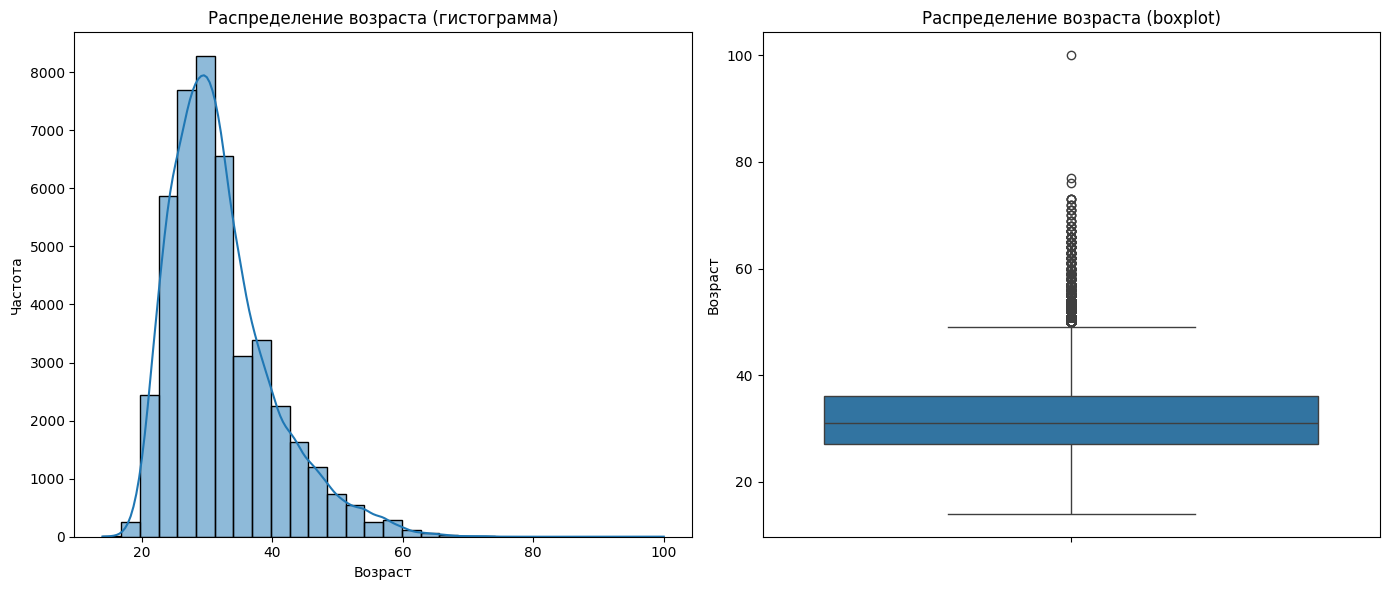

In [204]:
# Описательная статистика
print("Описание признака 'Возраст':")
print(df['Возраст'].describe())

# Мода
mode_age = df['Возраст'].mode()[0]
print("Мода распределения возраста:", mode_age)

# Гистограмма и boxplot рядом
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Гистограмма
sns.histplot(df['Возраст'], bins=30, kde=True, ax=axes[0])
axes[0].set_title('Распределение возраста (гистограмма)')
axes[0].set_xlabel('Возраст')
axes[0].set_ylabel('Частота')

# Boxplot
sns.boxplot(y=df['Возраст'], ax=axes[1])
axes[1].set_title('Распределение возраста (boxplot)')
axes[1].set_ylabel('Возраст')

plt.tight_layout()
plt.show()

ваши выводы по графику здесь

2. Постройте распределение признака **"Опыт работы (месяц)"**. Опишите данное распределение, отвечая на следующие вопросы: чему равна мода распределения, каковы предельные значения признака, в каком примерном интервале находится опыт работы большинства соискателей? Есть ли аномалии для признака опыта работы, какие значения вы бы причислили к их числу?
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*

Описание признака 'Опыт работы (месяц)':
count    44572.000000
mean       115.805551
std         77.651640
min         12.000000
25%         61.000000
50%        102.000000
75%        154.000000
max       1188.000000
Name: Опыт работы (месяц), dtype: float64
Мода распределения опыта (месяц): 48.0


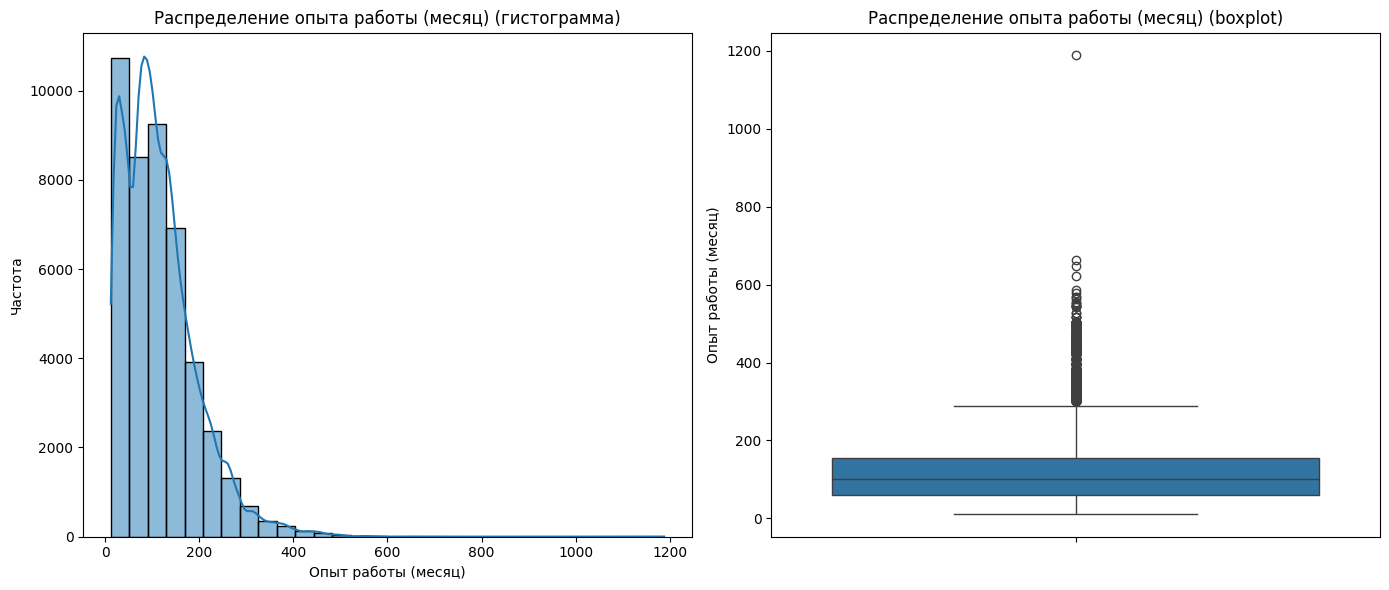

In [205]:
# ваш код здесь
# Предполагается, что df уже загружен и содержит столбец "Опыт работы (месяц)".

# Описательная статистика
print("Описание признака 'Опыт работы (месяц)':")
print(df['Опыт работы (месяц)'].describe())

# Мода
mode_experience = df['Опыт работы (месяц)'].mode()[0]
print("Мода распределения опыта (месяц):", mode_experience)

# Построим гистограмму и boxplot рядом
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Гистограмма
sns.histplot(df['Опыт работы (месяц)'], bins=30, kde=True, ax=axes[0])
axes[0].set_title('Распределение опыта работы (месяц) (гистограмма)')
axes[0].set_xlabel('Опыт работы (месяц)')
axes[0].set_ylabel('Частота')

# Boxplot
sns.boxplot(y=df['Опыт работы (месяц)'], ax=axes[1])
axes[1].set_title('Распределение опыта работы (месяц) (boxplot)')
axes[1].set_ylabel('Опыт работы (месяц)')

plt.tight_layout()
plt.show()

ваши выводы здесь

3. Постройте распределение признака **"ЗП (руб)"**. Опишите данное распределение, отвечая на следующие вопросы: каковы предельные значения признака, в каком примерном интервале находится заработная плата большинства соискателей? Есть ли аномалии для признака возраста? Обратите внимание на гигантские размеры желаемой заработной платы.
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*


Описание признака 'ЗП (руб)':
count    4.474400e+04
mean     7.627669e+04
std      1.360168e+05
min      1.000000e+00
25%      3.572107e+04
50%      5.800000e+04
75%      9.500000e+04
max      2.430488e+07
Name: ЗП (руб), dtype: float64


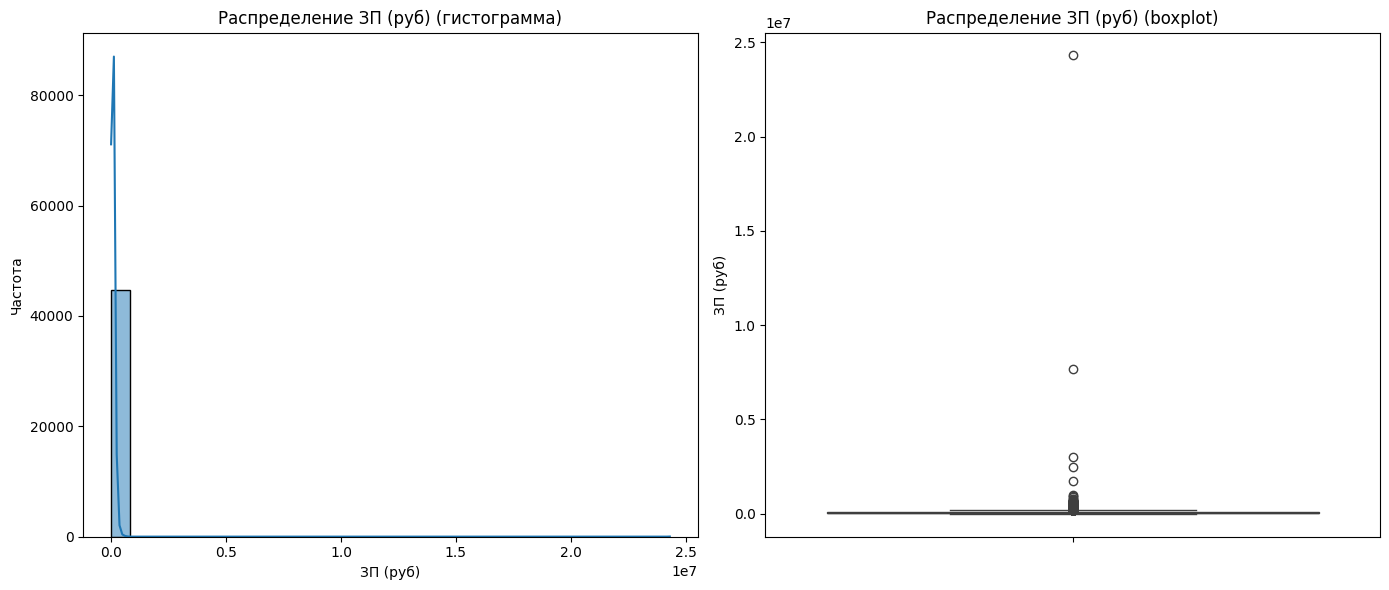

In [206]:
# Предполагается, что df уже загружен и содержит столбец "ЗП (руб)"

# Описательная статистика
print("Описание признака 'ЗП (руб)':")
print(df['ЗП (руб)'].describe())

# Построим гистограмму и boxplot рядом
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Гистограмма
sns.histplot(df['ЗП (руб)'], bins=30, kde=True, ax=axes[0])
axes[0].set_title('Распределение ЗП (руб) (гистограмма)')
axes[0].set_xlabel('ЗП (руб)')
axes[0].set_ylabel('Частота')

# Boxplot
sns.boxplot(y=df['ЗП (руб)'], ax=axes[1])
axes[1].set_title('Распределение ЗП (руб) (boxplot)')
axes[1].set_ylabel('ЗП (руб)')

plt.tight_layout()
plt.show()


ваши выводы здесь

4. Постройте диаграмму, которая показывает зависимость **медианной** желаемой заработной платы (**"ЗП (руб)"**) от уровня образования (**"Образование"**). Используйте для диаграммы данные о резюме, где желаемая заработная плата меньше 1 млн рублей.
*Сделайте выводы по представленной диаграмме: для каких уровней образования наблюдаются наибольшие и наименьшие уровни желаемой заработной платы? Как вы считаете, важен ли признак уровня образования при прогнозировании заработной платы?*

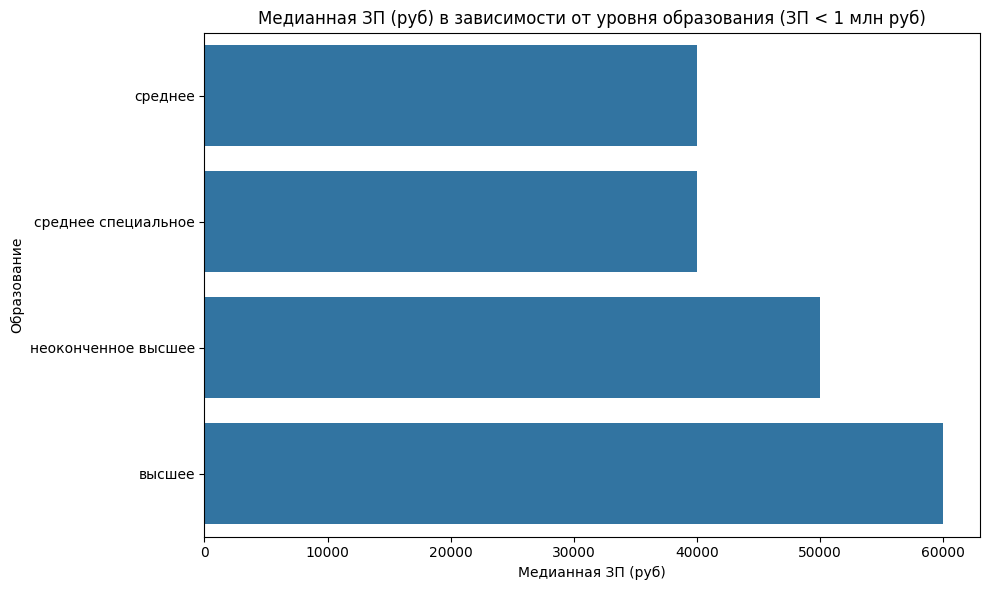

In [ ]:
# ваш код здесь
# Отфильтруем данные: ЗП (руб) < 1 000 000
df_filtered = df[df['ЗП (руб)'] < 1000000]

# Группируем по уровню образования и считаем медиану ЗП
median_salary_by_education = df_filtered.groupby('Образование')['ЗП (руб)'].median().sort_values()

# Строим столбчатую диаграмму
plt.figure(figsize=(10, 6))
sns.barplot(x=median_salary_by_education.values, y=median_salary_by_education.index, orient='h')
plt.title('Медианная ЗП (руб) в зависимости от уровня образования (ЗП < 1 млн руб)')
plt.xlabel('Медианная ЗП (руб)')
plt.ylabel('Образование')
plt.tight_layout()
plt.show()


ваши выводы здесь

5. Постройте диаграмму, которая показывает распределение желаемой заработной платы (**"ЗП (руб)"**) в зависимости от города (**"Город"**). Используйте для диаграммы данные о резюме, где желая заработная плата меньше 1 млн рублей.
*Сделайте выводы по полученной диаграмме: как соотносятся медианные уровни желаемой заработной платы и их размах в городах? Как вы считаете, важен ли признак города при прогнозировании заработной платы?*

In [ ]:
# ваш код здесь
# Отфильтруем данные: ЗП (руб) < 1 000 000
df_filtered = df[df['ЗП (руб)'] < 1000000]

# Строим boxplot по городу
plt.figure(figsize=(10, 6))
sns.boxplot(x='Город', y='ЗП (руб)', data=df_filtered)
plt.title('Распределение ЗП (руб) по городам (ЗП < 1 млн руб)')
plt.xlabel('Город')
plt.ylabel('ЗП (руб)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


ValueError: Could not interpret value `Город` for `x`. An entry with this name does not appear in `data`.

<Figure size 1000x600 with 0 Axes>

ваши выводы здесь

6. Постройте **многоуровневую столбчатую диаграмму**, которая показывает зависимость медианной заработной платы (**"ЗП (руб)"**) от признаков **"Готовность к переезду"** и **"Готовность к командировкам"**. Проанализируйте график, сравнив уровень заработной платы в категориях.

In [ ]:
# ваш код здесь
# Предполагается, что df содержит столбцы "Готовность к переезду", "Готовность к командировкам" и "ЗП (руб)"

# Группируем данные по двум категориальным признакам и вычисляем медиану
median_salary = df.groupby(['Готовность к переезду', 'Готовность к командировкам'])['ЗП (руб)'].median()

# Преобразуем результаты в удобную для построения форму (таблицу)
median_salary = median_salary.unstack('Готовность к командировкам')

# Строим многоуровневую столбчатую диаграмму
ax = median_salary.plot(kind='bar', figsize=(10, 6))
ax.set_title('Медианная зарплата в зависимости от готовности к переезду и командировкам')
ax.set_xlabel('Готовность к переезду')
ax.set_ylabel('Медианная ЗП (руб)')

plt.xticks(rotation=0)
plt.legend(title='Готовность к командировкам', bbox_to_anchor=(1.0, 1.0))
plt.tight_layout()
plt.show()


KeyError: 'Готовность к переезду'

In [150]:
# ваши выводы здесь

7. Постройте сводную таблицу, иллюстрирующую зависимость **медианной** желаемой заработной платы от возраста (**"Возраст"**) и образования (**"Образование"**). На полученной сводной таблице постройте **тепловую карту**. Проанализируйте тепловую карту, сравнив показатели внутри групп.

In [ ]:
# ваш код здесь

pivot_table = df.pivot_table(
    values='ЗП', 
    index='Образование', 
    columns='Возраст', 
    aggfunc='median'
)

# Строим тепловую карту по полученной сводной таблице
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, fmt=".0f", cmap='coolwarm')
plt.title('Медианная ЗП в зависимости от возраста и образования')
plt.xlabel('Возраст')
plt.ylabel('Образование')
plt.show()


ValueError: zero-size array to reduction operation fmin which has no identity

<Figure size 1200x800 with 0 Axes>

ваши выводы здесь

8. Постройте **диаграмму рассеяния**, показывающую зависимость опыта работы (**"Опыт работы (месяц)"**) от возраста (**"Возраст"**). Опыт работы переведите из месяцев в года, чтобы признаки были в едином масштабе. Постройте на графике дополнительно прямую, проходящую через точки (0, 0) и (100, 100). Данная прямая соответствует значениям, когда опыт работы равен возрасту человека. Точки, лежащие на этой прямой и выше нее - аномалии в наших данных (опыт работы больше либо равен возрасту соискателя)

In [152]:
# ваш код здесь

ваши выводы здесь

**Дополнительные баллы**

Для получения 2 дополнительных баллов по разведывательному анализу постройте еще два любых содержательных графика или диаграммы, которые помогут проиллюстрировать влияние признаков/взаимосвязь между признаками/распределения признаков. Приведите выводы по ним. Желательно, чтобы в анализе участвовали признаки, которые мы создавали ранее в разделе "Преобразование данных".


In [153]:
# ваш код здесь

ваши выводы здесь

# Очистка данных

1. Начнем с дубликатов в наших данных. Найдите **полные дубликаты** в таблице с резюме и удалите их. 

In [154]:
# ваш код здесь
# Посчитаем количество полных дубликатов до удаления
print("Количество полных дубликатов до удаления:", df.duplicated().sum())

# Удалим полные дубликаты
df = df.drop_duplicates()

# Проверим, сколько дубликатов осталось
print("Количество полных дубликатов после удаления:", df.duplicated().sum())
print(df.columns)



Количество полных дубликатов до удаления: 156
Количество полных дубликатов после удаления: 0
Index(['ЗП', 'Ищет работу на должность:', 'Город, переезд, командировки',
       'Занятость', 'График', 'Последнее/нынешнее место работы',
       'Последняя/нынешняя должность', 'Обновление резюме', 'Авто',
       'Образование', 'Пол', 'Возраст', 'Опыт работы (месяц)'],
      dtype='object')


2. Займемся пропусками. Выведите информацию **о числе пропусков** в столбцах. 

In [ ]:
# ваш код здесь
# Вывод информации о числе пропусков по каждому столбцу
print(df.isna().sum())


ЗП                                   0
Ищет работу на должность:            0
Город, переезд, командировки         0
Занятость                            0
График                               0
Последнее/нынешнее место работы      1
Последняя/нынешняя должность         2
Обновление резюме                    0
Авто                                 0
Образование                          0
Пол                                  0
Возраст                              0
Опыт работы (месяц)                170
dtype: int64


3. Итак, у нас есть пропуски в 3ех столбцах: **"Опыт работы (месяц)"**, **"Последнее/нынешнее место работы"**, **"Последняя/нынешняя должность"**. Поступим следующим образом: удалите строки, где есть пропуск в столбцах с местом работы и должностью. Пропуски в столбце с опытом работы заполните **медианным** значением.

In [160]:
# ваш код здесь
# Удаляем строки, в которых есть пропуски в указанных столбцах
df = df.dropna(subset=['Последнее/нынешнее место работы', 'Последняя/нынешняя должность'])

# Находим медиану для столбца "Опыт работы (месяц)"
median_experience = df['Опыт работы (месяц)'].median()

# Заполняем пропуски в "Опыт работы (месяц)" медианным значением
df['Опыт работы (месяц)'] = df['Опыт работы (месяц)'].fillna(median_experience)


4. Мы добрались до ликвидации выбросов. Сначала очистим данные вручную. Удалите резюме, в которых указана заработная плата либо выше 1 млн. рублей, либо ниже 1 тыс. рублей.

In [163]:
# Приводим столбец "ЗП" к числовому типу (если он ещё не числовой)
df['ЗП'] = pd.to_numeric(df['ЗП'], errors='coerce')

# Фильтруем строки, удаляя те, где ЗП меньше 1000 или больше 1 000 000
df = df[(df['ЗП'] >= 1000) & (df['ЗП'] <= 1000000)]


5. В процессе разведывательного анализа мы обнаружили резюме, в которых **опыт работы в годах превышал возраст соискателя**. Найдите такие резюме и удалите их из данных


In [164]:
# ваш код здесь
# Вычисляем опыт работы в годах
experience_in_years = df['Опыт работы (месяц)'] / 12

# Фильтруем датафрейм, удаляя строки, где опыт в годах больше возраста
df = df[experience_in_years <= df['Возраст']]


6. В результате анализа мы обнаружили потенциальные выбросы в признаке **"Возраст"**. Это оказались резюме людей чересчур преклонного возраста для поиска работы. Попробуйте построить распределение признака в **логарифмическом масштабе**. Добавьте к графику линии, отображающие **среднее и границы интервала метода трех сигм**. Напомним, сделать это можно с помощью метода axvline. Например, для построение линии среднего будет иметь вид:

`histplot.axvline(log_age.mean(), color='k', lw=2)`

В какую сторону асимметрично логарифмическое распределение? Напишите об этом в комментарии к графику.
Найдите выбросы с помощью метода z-отклонения и удалите их из данных, используйте логарифмический масштаб. Давайте сделаем послабление на **1 сигму** (возьмите 4 сигмы) в **правую сторону**.

Выведите таблицу с полученными выбросами и оцените, с каким возрастом соискатели попадают под категорию выбросов?

TypeError: boolean value of NA is ambiguous

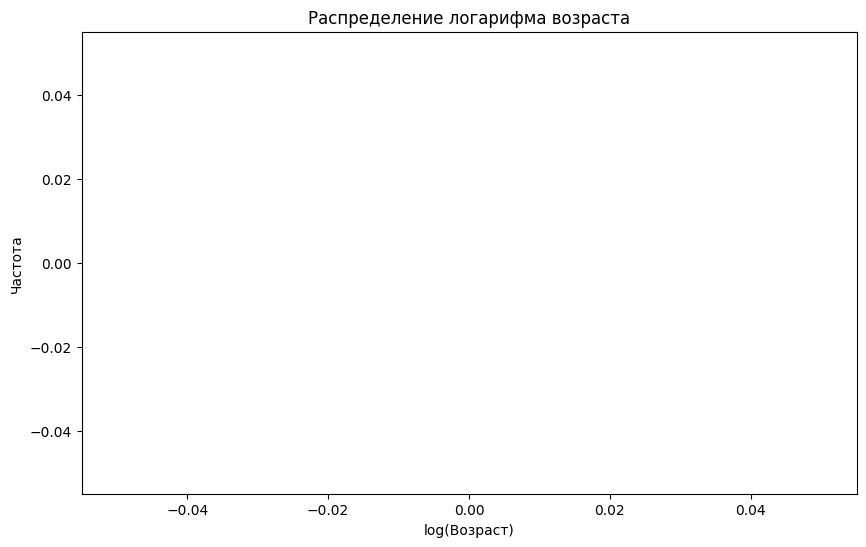

In [ ]:
# Предполагается, что df уже определен и в нем есть столбец "Возраст"
# Удаляем некорректные значения возраста (пропуски и возраст <= 0)
df = df[df['Возраст'].notna() & (df['Возраст'] > 0)]

# Логарифмируем возраст
log_age = np.log(df['Возраст'])

# Рассчитаем среднее и стандартное отклонение логарифма возраста
mean_log = log_age.mean()
std_log = log_age.std()

# Строим гистограмму логарифма возраста с линиями границ
plt.figure(figsize=(10, 6))
histplot = sns.histplot(log_age, bins=30, kde=True)
histplot.set_title('Распределение логарифма возраста')
histplot.set_xlabel('log(Возраст)')
histplot.set_ylabel('Частота')

# Линии среднего и границ
histplot.axvline(mean_log, color='k', lw=2, label='mean')
histplot.axvline(mean_log + 3*std_log, color='r', lw=2, linestyle='--', label='+3σ')
histplot.axvline(mean_log - 3*std_log, color='r', lw=2, linestyle='--', label='-3σ')
histplot.axvline(mean_log + 4*std_log, color='g', lw=2, linestyle=':', label='+4σ')

plt.legend()
plt.show()

# Рассчет z-оценок
z_scores = (log_age - mean_log) / std_log

# Удалим строки, где z_scores = NaN (если такие есть)
notna_mask = z_scores.notna()
df = df[notna_mask]
z_scores = z_scores[notna_mask]

# Границы выбросов
lower_bound = -3
upper_bound = 4

# Формируем булевую маску для выбросов
mask = (z_scores < lower_bound) | (z_scores > upper_bound)

# На случай, если где-то остались пропуски (хотя их быть не должно), заполним их False
mask = mask.fillna(False)

# Извлекаем выбросы
outliers = df[mask]

print("Выбросы по возрасту (логарифмическая шкала):")
print(outliers[['Возраст']])

if not outliers.empty:
    min_outlier_age = outliers['Возраст'].min()
    max_outlier_age = outliers['Возраст'].max()
    print(f"Минимальный возраст выброса: {min_outlier_age}")
    print(f"Максимальный возраст выброса: {max_outlier_age}")

# Удаляем выбросы из данных
df = df[~mask]  # инвертируем маску, чтобы оставить данные без выбросов


ваш коммментарий здесь